In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
df = pd.read_csv('co2_emissions_kt_by_country.csv')
df.head

<bound method NDFrame.head of       country_code country_name  year         value
0              ABW        Aruba  1960  11092.675000
1              ABW        Aruba  1961  11576.719000
2              ABW        Aruba  1962  12713.489000
3              ABW        Aruba  1963  12178.107000
4              ABW        Aruba  1964  11840.743000
...            ...          ...   ...           ...
13948          ZWE     Zimbabwe  2015  12430.000305
13949          ZWE     Zimbabwe  2016  11020.000458
13950          ZWE     Zimbabwe  2017  10340.000153
13951          ZWE     Zimbabwe  2018  12380.000114
13952          ZWE     Zimbabwe  2019  11760.000229

[13953 rows x 4 columns]>

In [11]:
asia = df[df['country_name'].str.contains('Asia')]['country_name'].unique()
europe = df[df['country_name'].str.contains('Euro')]['country_name'].unique()
caribbean = df[df['country_name'].str.contains('Caribbean')]['country_name'].unique()
africa = df[df['country_name'].str.contains('Africa')]['country_name'].unique() # remove South Africa
africa = africa[africa != 'South Africa']

demographic = df[df['country_name'].str.contains('demo')]['country_name'].unique()
ida = df[df['country_name'].str.contains('IDA')]['country_name'].unique()
ibrd = df[df['country_name'].str.contains('IBRD')]['country_name'].unique()

income = df[df['country_name'].str.contains('income')]['country_name'].unique()

country_groups = np.concatenate((asia, europe, caribbean, africa,))

df_country = df.query("country_name not in @country_groups").copy() # Data with only countries for rows (no aggregates)

In [13]:
fig = px.choropleth(df_country, locations="country_code",
                    animation_frame="year", animation_group="country_name",
                    color="value", 
                    hover_name="country_name",
                    hover_data=['year', 'country_name', 'value'],
                    color_continuous_scale=px.colors.sequential.dense)


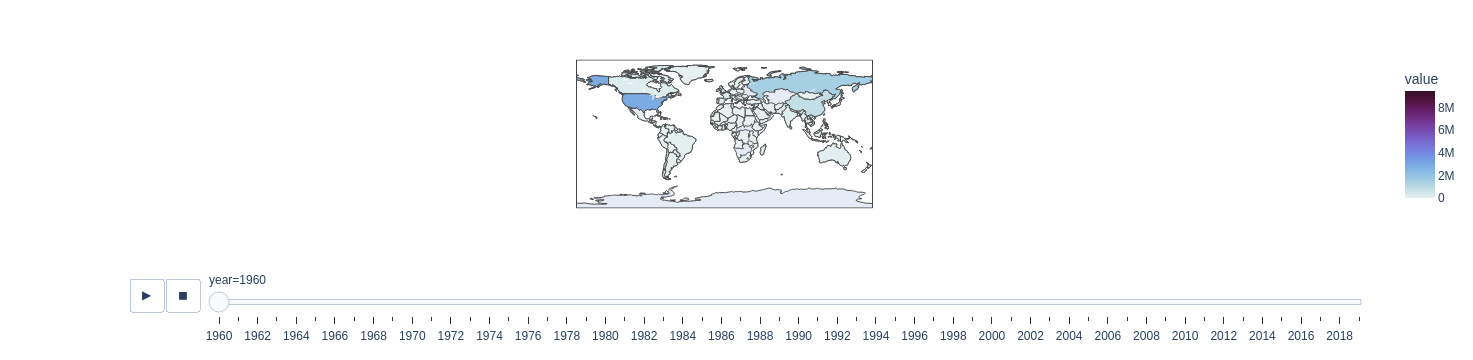

In [14]:

fig.show()